<a href="https://colab.research.google.com/github/qurainisepty/portfolio/blob/main/Twitter_user_sentiment_analysis_about_technology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library & package. 

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [ ]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit= True)

In [ ]:
search_words = "teknologi"
date_since = "2020-01-01"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search_tweets,
        q=new_search,
        lang="id",
        since=date_since).items(300)

items = []
for tweet in tweets:
    items.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))
hasil = pd.DataFrame(data=items, columns=['tweet'])
hasil

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,tweet
0,Ayang baru mengenal teknologi bernama charger
1,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...
2,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...
3,aku underwater selalu takjub sama binatang2 la...
4,Kemajuan teknologi internet kepopuleran podcas...
...,...
295,Beberapa usulan tersebut adalah sebagai beriku...
296,Teknologi 4 0
297,Teknologi bikin anak mereka pinter sekali samp...
298,Selamat sore massa kampus itb Perkenalkan kami...


In [ ]:
#Text Preprocessing

def case_folding(data):
    data = data.replace("5G", "fiveG")
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)"," ", data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = data.strip()
    return data

def tokenizing(data):
    data = word_tokenize(data)
    return data

def clear_stopword(data):
    indonesia_s = stopwords.words('indonesian')
    data = [word for word in data if word not in indonesia_s]
    data = ' '.join(data)
    return data

slang_dict = {"abis": "habis", "ad": "ada", "adlh": "adalah","blum": "belum", "bikin":"membuat","bosss":"bos","brrti":"berarti","gaperna":"tidak pernah","nggak":"tidak","nahhh":"nah","sii":"sih", "temenya":"temanya", "kemaren":"kemarin", "tu":"itu", "yg":"yang", "hrs":"harus"}
def slang_words(data):
    words = data.split()
    new_words = [] 
    for word in words:
        if word.lower() in slang_dict:
            word = slang_dict[word.lower()]
        new_words.append(word)
    data = " ".join(new_words)
    return data

hasil['clean_tweet'] = hasil['tweet'].apply(case_folding)
hasil['clean_tweet'] = hasil['clean_tweet'].apply(tokenizing)
hasil['clean_tweet'] = hasil['clean_tweet'].apply(clear_stopword)
hasil['clean_tweet']  = hasil['clean_tweet'] .apply(slang_words)
hasil

,tweet,clean_tweet
0,Ayang baru mengenal teknologi bernama charger,ayang mengenal teknologi bernama charger
1,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...,merah putih peristiwa jam wib live antv antv l...
2,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...,merah putih peristiwa jam wib live antv antv l...
3,aku underwater selalu takjub sama binatang2 la...,underwater takjub binatang laut tidak pernah k...
4,Kemajuan teknologi internet kepopuleran podcas...,kemajuan teknologi internet kepopuleran podcas...
...,...,...
295,Beberapa usulan tersebut adalah sebagai beriku...,usulan kajian pengumpulan data evidences based
296,Teknologi 4 0,teknologi
297,Teknologi bikin anak mereka pinter sekali samp...,teknologi membuat anak pinter tidak tau anakny...
298,Selamat sore massa kampus itb Perkenalkan kami...,selamat sore massa kampus itb perkenalkan nadi...


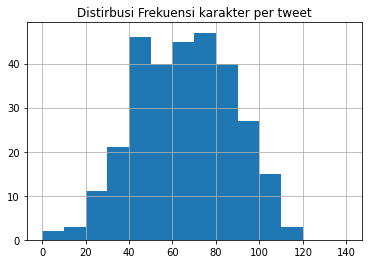

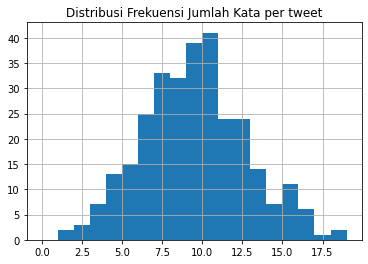

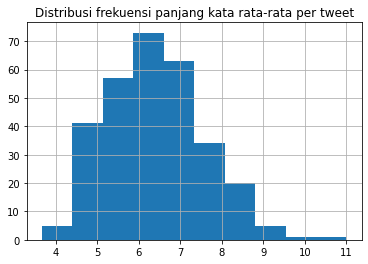

[('teknologi', 212), ('yang', 31), ('ya', 21), ('informasi', 14), ('banget', 14), ('ga', 13), ('institut', 13), ('amp', 13), ('udah', 12), ('indonesia', 12), ('modern', 11), ('kemajuan', 10), ('orang', 10), ('data', 10), ('dunia', 9), ('sih', 9), ('dah', 9), ('gak', 9), ('era', 8), ('digital', 8)]


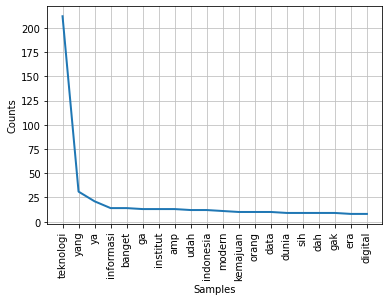

Distribusi bi-gram
 (teknologi, informasi)        12
(teknologi, yang)              9
(institut, teknologi)          9
(kemajuan, teknologi)          8
(pengumpulan, data)            6
(teknologi, canggih)           6
(berkembangnya, teknologi)     6
(hibah, teknologi)             6
(civitas, akademika)           5
(akademika, teknologi)         5
(evidences, based)             5
(data, evidences)              5
(teknologi, bagus)             5
(banget, ya)                   5
(seiring, berkembangnya)       5
(teknologi, bernama)           5
(ya, seiring)                  5
(bagus, banget)                5
(era, teknologi)               4
(teknologi, bandung)           4
dtype: int64


In [ ]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis

# Distirbusi Frekuensi karakter per tweet
bin_range = np.arange(0, 150,10)
hasil['clean_tweet'].str.len().hist(bins=bin_range)
plt.title("Distirbusi Frekuensi karakter per tweet")
plt.show()

# Distribusi Frekuensi Jumlah Kata per tweet
bin_range = np.arange(0, 20)
hasil['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.title("Distribusi Frekuensi Jumlah Kata per tweet")
plt.show()

# Distribusi frekuensi panjang kata rata-rata per tweet
hasil['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title("Distribusi frekuensi panjang kata rata-rata per tweet")
plt.show()

# Distribusi kata
hasil['clean_tweet'] = hasil['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in hasil['clean_tweet'] for word in tweet]
fqdist = FreqDist(tweets)
most_common_word = fqdist.most_common(20)
print(most_common_word)
fqdist.plot(20,cumulative=False)
plt.show()

# Distribusi bi-gram
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print("Distribusi bi-gram\n",result)


In [ ]:
#Pembersihan slang words
slang_dict = {"banget":"sangat", "ga": "tidak","gak":"tidak", "udah":"sudah", "dah":"sudah"}
def slang_words(data):
    words = data
    new_words = [] 
    for word in words:
        if word.lower() in slang_dict:
            word = slang_dict[word.lower()]
        new_words.append(word)
    data = " ".join(new_words)
    return data

hasil['clean_tweet']  = hasil['clean_tweet'] .apply(slang_words)
hasil

,tweet,clean_tweet
0,Ayang baru mengenal teknologi bernama charger,ayang mengenal teknologi bernama charger
1,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...,merah putih peristiwa jam wib live antv antv l...
2,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...,merah putih peristiwa jam wib live antv antv l...
3,aku underwater selalu takjub sama binatang2 la...,underwater takjub binatang laut tidak pernah k...
4,Kemajuan teknologi internet kepopuleran podcas...,kemajuan teknologi internet kepopuleran podcas...
...,...,...
295,Beberapa usulan tersebut adalah sebagai beriku...,usulan kajian pengumpulan data evidences based
296,Teknologi 4 0,teknologi
297,Teknologi bikin anak mereka pinter sekali samp...,teknologi membuat anak pinter tidak tau anakny...
298,Selamat sore massa kampus itb Perkenalkan kami...,selamat sore massa kampus itb perkenalkan nadi...


Ayang baru mengenal teknologi bernama charger
positif: 0
negatif: 0
MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WIB LIVE di ANTV ANTV Lovers di era teknologi yang semakin tumbuh
positif: 0
negatif: 0
MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WIB LIVE di ANTV ANTV Lovers di era teknologi yang semakin tumbuh
positif: 0
negatif: 0
aku underwater selalu takjub sama binatang2 laut yang gaperna keliatan tapi NYATAA karena ada jejak digital huhu terimakasih teknologi
positif: 0
negatif: 0
Kemajuan teknologi internet kepopuleran podcast audiobook youtube netflix disaat yang sama aku merindukan buku
kemajuan
 ['positif']
positif: 1
negatif: 0
Di akhir zaman orang2 jahat antek2 dajjal menyebarkan sihir2 mereka ke seluruh penjuru dunia dengan memanfaatkan
jahat
 ['negatif']
positif: 0
negatif: 1
Vivo V23 5G Meluncur di RI Ponsel Rp5 Jutaan Bisa Berubah Warna
bisa
 ['positif']
positif: 1
negatif: 0
iya RP iya di akun lain atau di kktnya gitu Jean kan belum pernah ngerasain pacaran di zaman rp te

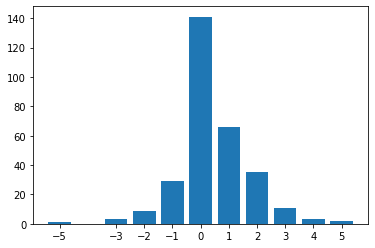

In [ ]:
#Sentiment Analysis 

pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()  

sentiment = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    sentiment.append(count_p - count_n)
    # print ("-----------------------------------------------------")
    
print ("Nilai rata-rata: "+str(np.mean(sentiment)))
print ("Standar deviasi: "+str(np.std(sentiment)))

labels, counts = np.unique(sentiment, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [ ]:
hasil['sentiment'] = pd.DataFrame(data=sentiment)
hasil

,tweet,clean_tweet,sentiment
0,Ayang baru mengenal teknologi bernama charger,ayang mengenal teknologi bernama charger,0
1,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...,merah putih peristiwa jam wib live antv antv l...,0
2,MERAH PUTIH PERISTIWA SETIAP HARI JAM 00 30 WI...,merah putih peristiwa jam wib live antv antv l...,0
3,aku underwater selalu takjub sama binatang2 la...,underwater takjub binatang laut tidak pernah k...,0
4,Kemajuan teknologi internet kepopuleran podcas...,kemajuan teknologi internet kepopuleran podcas...,1
...,...,...,...
295,Beberapa usulan tersebut adalah sebagai beriku...,usulan kajian pengumpulan data evidences based,0
296,Teknologi 4 0,teknologi,0
297,Teknologi bikin anak mereka pinter sekali samp...,teknologi membuat anak pinter tidak tau anakny...,0
298,Selamat sore massa kampus itb Perkenalkan kami...,selamat sore massa kampus itb perkenalkan nadi...,1


In [ ]:
insight:

Text data analytics:
Sebagian besar tweet memiliki 8-11 kata dengan setiap kata rata-rata berada dikisaran 6-7 karakter dan total karakter sebanyak 60-80 karakter per tweet.
Dengan melihat bi-gram tersebut kita mendapat gambaran yang lebih jelas, bahwa tweets membahas tentang perkembangan teknologi yang semakin canggih

Sentiment analysis:
Berdasarkan plot nilai sentimen terhadap jumlah, dapat diketahui bahwa dari 300 tweets terkait dengan teknologi, sentimen masyarakat tweeter cenderung ke arah positif meskipun pada saat itu terdapat wabah covid.
